In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
%matplotlib inline

In [2]:
%cd drive/MyDrive/Colab\ Notebooks

/content/drive/MyDrive/Colab Notebooks


**Read CSV:**

In [3]:
key_report = pd.read_csv('key_report_1.csv')
key_report.head()

,ItemID,Unnamed: 1
0,7985785,"title,abstract,background,methods,results,conc..."
1,4837660,"title,abstract,background,case_presentation,co..."
2,4466444,"title,abstract,background,methods,results,conc..."
3,8620634,"title,abstract,background,case_presentation,co..."
4,8420016,"title,abstract,background,methods,results,conc..."


In [4]:
len(key_report)

6825

**Rename column:**

In [5]:
df = key_report.rename(columns={'Unnamed: 1': 'KeyData'})

**Remove Non-alphanumeric characters from keys:**

In [6]:
regex = re.compile('[^a-zA-Z,_]')
df['KeyData'] = df['KeyData'].apply(lambda x: regex.sub('', x))

**Split data:**

In [7]:
df['KeyData'] = df['KeyData'].apply(lambda x: x.split(','))

**Check length of keys:**

In [8]:
df['KeyLen'] = df['KeyData'].apply(lambda x: len(x))

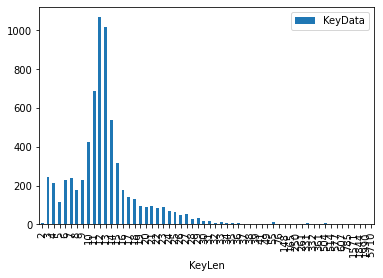

In [9]:
df[['KeyData','KeyLen']].groupby('KeyLen').count().plot(kind='bar')

**Set Index:**

In [10]:
df.set_index('ItemID', inplace=True)

**Check the dataset:**

In [11]:
df.head()

,KeyData,KeyLen
ItemID,,
7985785,"[title, abstract, background, methods, results...",15
4837660,"[title, abstract, background, case_presentatio...",12
4466444,"[title, abstract, background, methods, results...",21
8620634,"[title, abstract, background, case_presentatio...",12
8420016,"[title, abstract, background, methods, results...",17


**Check how many are above 15:**

In [12]:
df['KeyFifteen'] = df['KeyLen'] > 15
df.head()

,KeyData,KeyLen,KeyFifteen
ItemID,,,
7985785,"[title, abstract, background, methods, results...",15,False
4837660,"[title, abstract, background, case_presentatio...",12,False
4466444,"[title, abstract, background, methods, results...",21,True
8620634,"[title, abstract, background, case_presentatio...",12,False
8420016,"[title, abstract, background, methods, results...",17,True


In [13]:
df['KeyFifteen'].sum()

1318

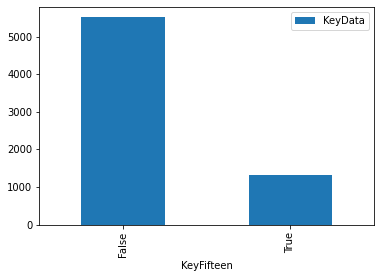

In [14]:
df[['KeyData','KeyFifteen']].groupby('KeyFifteen').count().plot(kind='bar')

**Check for "Introduction, Related work, Methods, Discussion, Results, Conclusion":**

In [15]:
tmp_arr = ["abstract", "introduction", "related_work", "methods", "discussion", "results", "conclusion"]

for arr_key in tmp_arr:
  df[arr_key] = df['KeyData'].apply(lambda x: arr_key in x)
 
df.head()

,KeyData,KeyLen,KeyFifteen,abstract,introduction,related_work,methods,discussion,results,conclusion
ItemID,,,,,,,,,,
7985785,"[title, abstract, background, methods, results...",15,False,True,False,False,True,True,True,True
4837660,"[title, abstract, background, case_presentatio...",12,False,True,False,False,False,True,False,False
4466444,"[title, abstract, background, methods, results...",21,True,True,False,False,True,True,True,False
8620634,"[title, abstract, background, case_presentatio...",12,False,True,False,False,False,False,False,False
8420016,"[title, abstract, background, methods, results...",17,True,True,False,False,True,True,True,False


In [16]:
df.iloc[:,3:].sum()

abstract        5419
introduction    3140
related_work       0
methods         1636
discussion      4513
results         2648
conclusion      1883
dtype: int64

**Generate list of all keys:**

In [17]:
bow = []

def add_to_set(key_list):
  for k in key_list:
    bow.append(k)

  return key_list

df['KeyData'].apply(add_to_set)

len(bow)

115253

**Unique items:**

In [18]:
set_bow = set(bow)
len(set_bow)

17067

**Count values:**

In [19]:
count_bow = pd.Series(bow).value_counts()

**Checking related key names and using them to recreate lists:**

In [25]:
count_bow[:40]

title                                         6825
abstract                                      5419
discussion                                    4513
about_this_article                            3856
author_information                            3407
rights_and_permissions                        3306
references                                    3212
introduction                                  3141
ethics_declarations                           2868
funding                                       2717
results                                       2684
background                                    2320
competing_interests                           2140
conclusions                                   2009
consent_for_publication                       1920
ethics_approval_and_consent_to_participate    1908
conclusion                                    1885
authors_contributions                         1864
availability_of_data_and_materials            1821
case_presentation              

In [26]:
# count_bow.to_csv('bow.csv')

All **6825** articles have titles.

In [29]:
nbow = pd.read_csv('data/bow.csv')
nbow.head()

,Unnamed: 0,0
0,title,6825
1,abstract,5419
2,discussion,4513
3,about_this_article,3856
4,author_information,3407


In [37]:
nbow[161:180]

,Unnamed: 0,0
161,_mihaela_rdulescu,24
162,_timioara,24
163,_cristina_dragomirescu,24
164,ethical_standards,24
165,_tokyo,24
166,_constana,24
167,_raluca_nstase,24
168,_hamilton,23
169,study_limitations,22
170,consent_to_participate,22


**Recreate lists:**

*Previous*:

* abstract        5419
* introduction    3140
* related_work       0
* methods         1636
* discussion      4513
* results         2648
* conclusion      1883

In [21]:
def anykey(names):
  return df['KeyData'].apply(lambda x: any(name in x for name in names))

In [38]:
df["abstract"]     = anykey(["abstract","summary","zusammenfassung"])
df["methods"]      = anykey(["method","methods","study_design","study_design_and_patients","materials_and_methods","patients_and_methods","material_and_methods","subjects_and_methods","procedures","study_procedures","methods_and_results"])
df["related_work"] = anykey(["related_work","background"])
df["discussion"]   = anykey(["discussion","diskussion","discussion_and_conclusion","results_and_discussion","discussions"])
df["results"]      = anykey(["results","outcomes","outcome","result","followup_and_outcomes","outcome_and_followup","methods_and_results"])
df["conclusion"]   = anykey(["conclusion","conclusions","discussion_and_conclusion"])

df.iloc[:,3:].sum()

abstract        5524
introduction    3140
related_work    2320
methods         2666
discussion      4815
results         2686
conclusion      3509
dtype: int64

* abstract        5524
* introduction    3140
* related_work     316
* methods         2665
* discussion      4815
* results         2686
* conclusion      3509

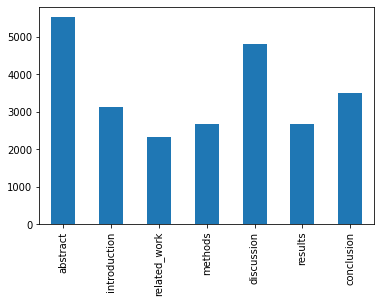

In [39]:
df.iloc[:,3:].sum().plot(kind='bar')